A complete dataset of socio-demographic and economic data at of New York City's Zip Code had been built using different sources as nyc.gov Open Data, data of New York city, 5 years survay of Census Bureau, NYC Health department website for the data referring to Covid-19 antibody testing and cumulative incidence; for this purpose the avaiable code related to the paper "Assessing capacity to social distance and neighborhood-level health disparities during the COVID-19 pandemic" (doi: https://doi.org/10.1101/2020.06.02.20120790) has been used.

In our case, NYC Health department data, that refer to antibody tests carried out, are updated at the 1st October, before the second round of infections, in order to focus on the first tide of the COVID-19 pandemic.
Positive cases per zipcode refers to the absolute number of people in that ZCTA that had result positive to the antibody test in the period from March to October 1st, 2020: this type of test can find out if someone has ever had the virus.
A more correct and precise indicator of the cumulative incidence of the SARS-CoV-2 infection at spatial level is the percentage of individuals positive to the antibody tests per 100,000 inhabitants.

Here is presented a correlation analysis of this variable with the socio-economic data for NYC.

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
import numpy as np
import statsmodels.api as ssm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
#socio-demographic and economic variables dataframe
data_per_zcta = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /COVID_19_data_Rstudio/Complete_data_per_zipcodes.csv")

#spatial information dataframe
x_shapes = gpd.read_file("/home/claudia/Scrivania/Tesi NYC pandemic /COVID_19_data_Rstudio/shapes/shapes.shp")
x_shapes['zcta']=pd.to_numeric(x_shapes['zcta'])

#complete dataframe of socio-economic variables and geometry at ZCTA level for NYC
complete_data_per_zcta = x_shapes.merge(data_per_zcta, on='zcta') 

#to show all the variables involved:
#complete_data_per_zcta.iloc[0]

In [12]:
#modify the titles of columns in the dataframes

complete_data_per_zcta.rename(columns={'Positive': 'Positive_cases'}, inplace=True)#absolute number of pos cases to antibody tests
complete_data_per_zcta.rename(columns={'Total': 'Tot_antibody_tests'}, inplace=True)
complete_data_per_zcta.rename(columns={'modzcta_cum_perc_pos': 'Perc_positive'}, inplace=True)
complete_data_per_zcta.rename(columns={'total_commute1': 'Tot_commuters'}, inplace=True)
complete_data_per_zcta.rename(columns={'not_insured': 'Perc_of_not_insured'}, inplace=True)

data_per_zcta.rename(columns={'Positive': 'Positive_cases'}, inplace=True)
data_per_zcta.rename(columns={'Total': 'Tot_antibody_tests'}, inplace=True)
data_per_zcta.rename(columns={'modzcta_cum_perc_pos': 'Perc_positive'}, inplace=True)
data_per_zcta.rename(columns={'total_commute1': 'Tot_commuters'}, inplace=True)
data_per_zcta.rename(columns={'not_insured': 'Perc_of_not_insured'}, inplace=True)
#not_quarantined_jobs refers to an estimates of workers still moving to go to workplace

data_per_zcta.drop(['valid_var','total_res_volume_zcta'], axis='columns', inplace=True)

### Pearson's correlation coefficient analysis for the indicator of spatial heterogeneity of the COVID-19 spread

The indicator of cumulative incidence of the COVID-19 infection in NYC is represented by the number of individuals resulted positive to the antibody tests per 100,000 inhabitants of each Zip Code since the outbreak of the pandemic till October 1st, 2021.
This variable is indicated in the dataframe with the title "pos_per_100000".

In [13]:
#standardize the data involved in the correlation analysis
data_per_zcta1 = data_per_zcta
data_per_zcta1.drop(['zcta','Borough', 'Neighborhood'], axis='columns', inplace=True)

std_data_per_zcta = pd.DataFrame(StandardScaler().fit_transform(data_per_zcta1), columns = data_per_zcta1.columns)

In [14]:
corr_matrix = std_data_per_zcta.corr() #Using Pearson's coefficient


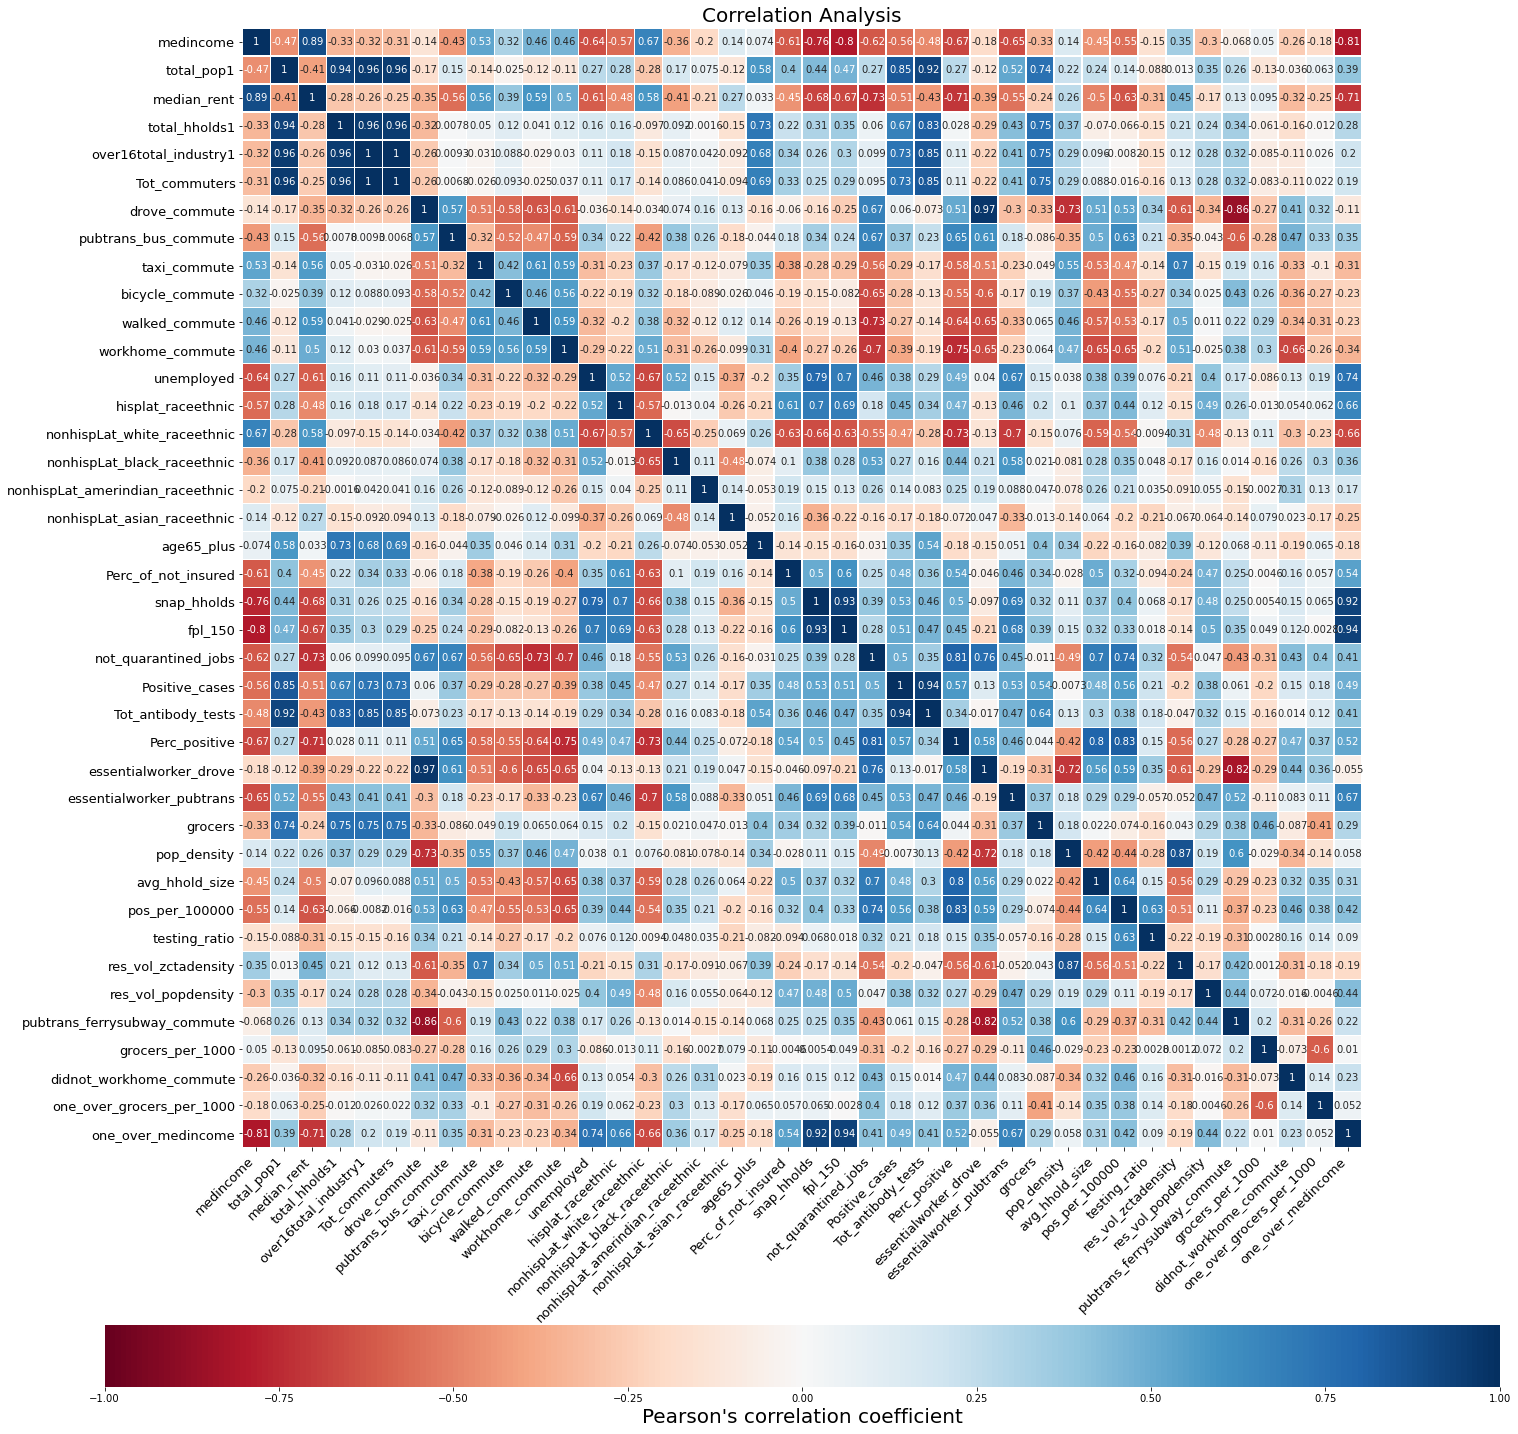

In [15]:
grid_kws = {"height_ratios" : (0.9, 0.05), "hspace" : 0.3}

fig, (ax, cbar_ax) = plt.subplots(2, gridspec_kw = grid_kws, figsize = (25,25))
ax = sns.heatmap(corr_matrix, ax = ax, vmin=-1, vmax=1, center=0, cmap="RdBu", square=True,
    annot=True,
    linewidths=.5,
    cbar_ax = cbar_ax,
    cbar_kws={"orientation": "horizontal", "label" : "Pearson's correlation coefficient"}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    fontsize = 13,
    horizontalalignment='right'
)

ax.set_yticklabels( ax.get_yticklabels(), fontsize = 13)

cbar_ax.figure.axes[-1].xaxis.label.set_size(20)

ax.set_title("Correlation Analysis", fontsize = 20);

In [16]:
corr_matrix['pos_per_100000'].sort_values(axis=0, ascending=False)

pos_per_100000                      1.000000
Perc_positive                       0.826214
not_quarantined_jobs                0.740557
avg_hhold_size                      0.642262
testing_ratio                       0.631328
pubtrans_bus_commute                0.629362
essentialworker_drove               0.591013
Positive_cases                      0.564765
drove_commute                       0.527686
didnot_workhome_commute             0.457688
hisplat_raceethnic                  0.437741
one_over_medincome                  0.420757
snap_hholds                         0.402952
unemployed                          0.385496
one_over_grocers_per_1000           0.382018
Tot_antibody_tests                  0.376229
nonhispLat_black_raceethnic         0.351590
fpl_150                             0.329469
Perc_of_not_insured                 0.324531
essentialworker_pubtrans            0.291524
nonhispLat_amerindian_raceethnic    0.214968
total_pop1                          0.138290
res_vol_po

Variables with a correlation coefficients higher then |0.42| :
    
- Perc_positive, percentuale di casi positivi (+0.83);
- not_quarantined_jobs(+0.74);
- avg_hhold_size, average number of individuals per household (+0.64);
- testing_ratio, fraction of tested residents (+0.63);
- pubtrans_bus_commute, commuter using public transports (+0.63);
- essentialworker_drove, workers driving with private car (+0.59);
- Positive_cases , absolute number of positive to antibody test (+0.565);
- drove_commute, commuters driving (+0.53);
- didnot_workhome_commute, commuters that cannot work from home (+0.46);
- hisplat_raceethnic (+0.44);
- one_over_medincome as social disadvantage indicator (+0.42);

- pop_density (-0.44);
- taxi_commute (-0.46);
- res_vol_zctadensity, densità abitanti per zcta (-0.50);
- walked_commute, residents commuting on foot (-0.53);
- nonhispLat_white_raceethnic, people of white ethnicity non hispanic or Latin (-0.54);
- bicycle_commute (-0.55);
- medincome, median income per person (-0.55);
- median_rent (-0.62);
- workhome_commute, commuters that work home(-0.65).

Before performing a Multiple linear regression, let's verify the assumption of absence of multicollinearity in this set of variables.
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

$VIF=\frac{1}{1-R^2}$

Where, $R^2$ is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of $R^2$, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher $R^2$ value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

We will use the dataframe of standardized variables:

In [37]:
X = std_data_per_zcta[['Perc_positive', 'not_quarantined_jobs', 'avg_hhold_size','testing_ratio','pubtrans_bus_commute', 'essentialworker_drove','Positive_cases','drove_commute','didnot_workhome_commute', 'hisplat_raceethnic','one_over_medincome','pop_density','taxi_commute','res_vol_zctadensity','walked_commute','nonhispLat_white_raceethnic','bicycle_commute','medincome','median_rent','workhome_commute']]

In [38]:
# VIF dataframe
vif_data = pd.DataFrame()
X = X.replace(np.nan,0)
vif_data["feature"] = X.columns


In [39]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Perc_positive,8.479663
1,not_quarantined_jobs,14.507795
2,avg_hhold_size,3.976852
3,testing_ratio,1.521911
4,pubtrans_bus_commute,2.731987
5,essentialworker_drove,46.032587
6,Positive_cases,2.377021
7,drove_commute,37.317711
8,didnot_workhome_commute,2.092971
9,hisplat_raceethnic,3.418979


In [43]:
#getting rid of not_quarantined_jobs, essentialworker_drove, drove_commute since VIF > 10
X2 = std_data_per_zcta[['Perc_positive', 'avg_hhold_size','testing_ratio','pubtrans_bus_commute','Positive_cases','didnot_workhome_commute', 'hisplat_raceethnic','one_over_medincome','pop_density','taxi_commute','res_vol_zctadensity','walked_commute','nonhispLat_white_raceethnic','bicycle_commute','medincome','median_rent','workhome_commute']]

vif_data2 = pd.DataFrame()
X2 = X2.replace(np.nan,0)
vif_data2["feature"] = X2.columns

# calculating VIF for each feature
vif_data2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(len(X2.columns))]

vif_data2

,feature,VIF
0,Perc_positive,7.986672
1,avg_hhold_size,3.458142
2,testing_ratio,1.349184
3,pubtrans_bus_commute,2.319922
4,Positive_cases,2.022915
5,didnot_workhome_commute,2.050660
6,hisplat_raceethnic,2.321025
7,one_over_medincome,4.505401
8,pop_density,8.410604
9,taxi_commute,3.179335


In [42]:
#fixing getting rid of variables with VIF >= 8
X3 = std_data_per_zcta[[ 'avg_hhold_size','testing_ratio','pubtrans_bus_commute','Positive_cases','didnot_workhome_commute', 'hisplat_raceethnic','one_over_medincome','taxi_commute','walked_commute','nonhispLat_white_raceethnic','bicycle_commute','workhome_commute']]

vif_data3 = pd.DataFrame()
X3 = X3.replace(np.nan,0)
vif_data3["variables"] = X3.columns

# calculating VIF for each feature
vif_data3["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(len(X3.columns))]

vif_data3

,variables,VIF
0,avg_hhold_size,2.705138
1,testing_ratio,1.169305
2,pubtrans_bus_commute,1.943641
3,Positive_cases,1.654181
4,didnot_workhome_commute,1.992606
5,hisplat_raceethnic,2.105827
6,one_over_medincome,2.683810
7,taxi_commute,2.006592
8,walked_commute,2.075042
9,nonhispLat_white_raceethnic,2.721758


"Positive cases" variable will be proportional to the number of positive cases per 100,000 inhabitants.

Defined this set of variables, let's verify the linear relationship between these predictors and the indipendent varibale ("pos_per_100000), output of the multiple linear regression.

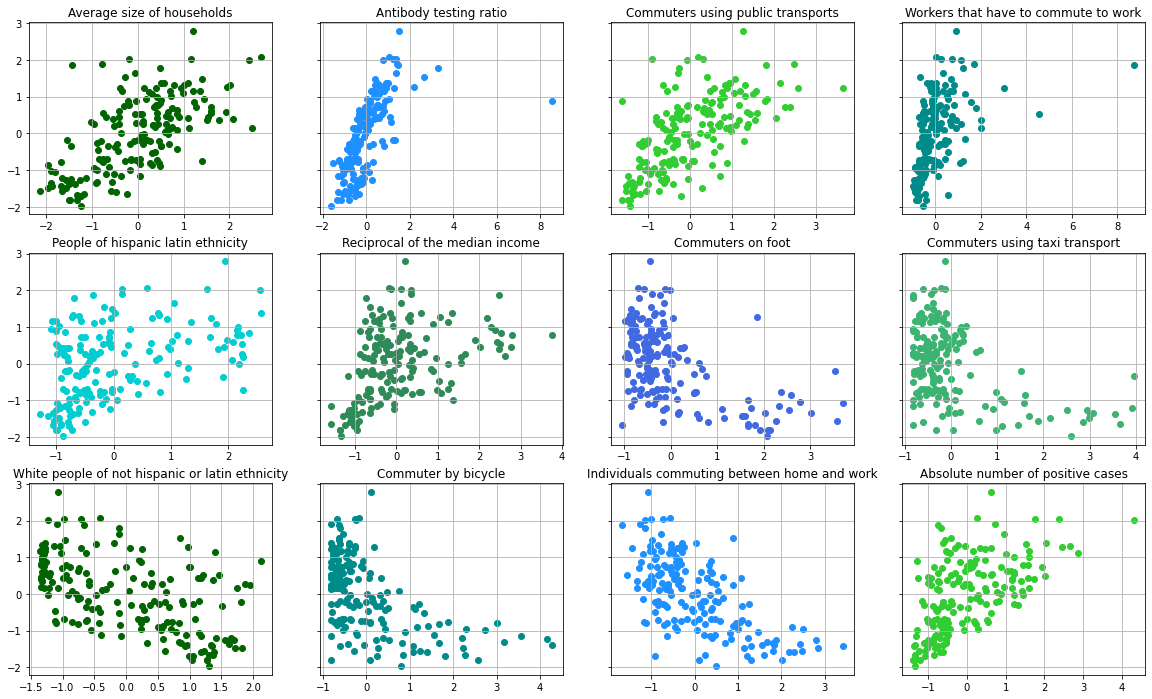

In [47]:
fig, axs = plt.subplots(3, 4, figsize=(20, 12), sharey=True)

axs[0][0].scatter(std_data_per_zcta['avg_hhold_size'], std_data_per_zcta['pos_per_100000'], s=None, c='darkgreen', marker=None)
axs[0][0].set_title("Average size of households", fontsize=12)
axs[0][0].grid()
axs[0][1].scatter(std_data_per_zcta['testing_ratio'],std_data_per_zcta['pos_per_100000'], s=None, c='dodgerblue', marker=None)
axs[0][1].set_title("Antibody testing ratio", fontsize=12)
axs[0][1].grid()
axs[0][2].scatter(std_data_per_zcta['pubtrans_bus_commute'],std_data_per_zcta['pos_per_100000'], s=None, c='limegreen', marker=None)
axs[0][2].set_title("Commuters using public transports", fontsize=12)
axs[0][2].grid()
axs[0][3].scatter(std_data_per_zcta['didnot_workhome_commute'],std_data_per_zcta['pos_per_100000'], s=None, c='darkcyan', marker=None)
axs[0][3].set_title("Workers that have to commute to work", fontsize=12)
axs[0][3].grid()

axs[1][0].scatter(std_data_per_zcta['hisplat_raceethnic'],std_data_per_zcta['pos_per_100000'], s=None, c='darkturquoise', marker=None)
axs[1][0].set_title("People of hispanic latin ethnicity", fontsize=12)
axs[1][0].grid()
axs[1][3].scatter(std_data_per_zcta['taxi_commute'],std_data_per_zcta['pos_per_100000'], s=None, c='mediumseagreen', marker=None)
axs[1][3].set_title("Commuters using taxi transport", fontsize=12)
axs[1][3].grid()
axs[1][1].scatter(std_data_per_zcta['one_over_medincome'],std_data_per_zcta['pos_per_100000'], s=None, c='seagreen', marker=None)
axs[1][1].set_title("Reciprocal of the median income", fontsize=12)
axs[1][1].grid()
axs[1][2].scatter(std_data_per_zcta['walked_commute'],std_data_per_zcta['pos_per_100000'], s=None, c='royalblue', marker=None)
axs[1][2].set_title("Commuters on foot", fontsize=12)
axs[1][2].grid()

axs[2][0].scatter(std_data_per_zcta['nonhispLat_white_raceethnic'], std_data_per_zcta['pos_per_100000'], s=None, c='darkgreen', marker=None)
axs[2][0].set_title("White people of not hispanic or latin ethnicity", fontsize=12)
axs[2][0].grid()
axs[2][1].scatter(std_data_per_zcta['bicycle_commute'],std_data_per_zcta['pos_per_100000'], s=None, c='darkcyan', marker=None)
axs[2][1].set_title("Commuter by bicycle", fontsize=12)
axs[2][1].grid()
axs[2][2].scatter(std_data_per_zcta['workhome_commute'],std_data_per_zcta['pos_per_100000'], s=None, c='dodgerblue', marker=None)
axs[2][2].set_title("Individuals working home", fontsize=12)
axs[2][2].grid()
axs[2][3].scatter(std_data_per_zcta['Positive_cases'],std_data_per_zcta['pos_per_100000'], s=None, c='limegreen', marker=None)
axs[2][3].set_title("Absolute number of positive cases", fontsize=12)
axs[2][3].grid()


Looking at scatterplots, I selected the variables with in linear relationship with the output, except for the absolute number of positive cases:

- Average size of housholds (avg_hhold_size);
- Testing ratio (testing_ratio);
- Commuters using public transport;
- workers that have to commute to workplace;
- Reciplocal of the median income as social disadvantage indicator;

These predictors are in a positive correlation relationship with the indipendent variable, i.e. the number of positive cases per 100,000 inhabitants per ZCTA.

### Multiple linear regression

In [49]:
X = std_data_per_zcta[['avg_hhold_size', 'testing_ratio', 'pubtrans_bus_commute' , 'didnot_workhome_commute','one_over_medincome']]
y = complete_data_per_zcta['pos_per_100000']

In [50]:
## fit a OLS model with intercept on the predictors
X=ssm.add_constant(X) 
model= ssm.OLS(y,X).fit()  
predictions= model.summary()

predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pos_per_100000   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     149.5
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.68e-60
Time:                        14:35:43   Log-Likelihood:                -1301.1
No. Observations:                 177   AIC:                             2614.
Df Residuals:                     171   BIC:                             2633.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2270.6102     28.815     78.799      0.000    2213.731    2327.489
avg_hhold_size            321.1522     33.878      9.480      0.000     254.279     388.025
testing_ratio             431.8606     29.588     14.596      0.000     373.456     490.265
pubtrans_bus_commute      203.7787     36.842      5.531      0.000     131.055     276.503
didnot_workhome_commute   101.1105     32.921      3.071      0.002      36.126     166.095
one_over_medincome        136.2901     31.225      4.365      0.000      74.655     197.926
==============================================================================
Omnibus:                       54.507   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.015
Skew:                          -0.779   Prob(JB):                    2.20e-115
Kurtosis:                      11.317   Cond. No.                         2.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""